# **I. Data Pre-processing**

Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Importing Dataset

In [5]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
link = 'https://drive.google.com/open?id=184-p2bd3P7Fn4FjV9b7-W3tW7XRLOMKN'

In [8]:
fluff, id = link.split('=')
print (id)

184-p2bd3P7Fn4FjV9b7-W3tW7XRLOMKN


In [9]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('Data_Startups.csv')
data = pd.read_csv('Data_Startups.csv')
# Dataset is now stored in a Pandas Dataframe
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,Iloilo,192261.83
1,162597.70,151377.59,443898.53,Bacolod,191792.06
2,153441.51,101145.55,407934.54,Cebu,191050.39
3,144372.41,118671.85,383199.62,NaN,182901.99
4,142107.34,91391.77,366168.42,Iloilo,166187.94
5,131876.90,99814.71,362861.36,Bacolod,156991.12
6,134615.46,147198.87,127716.82,Cebu,156122.51
7,130298.13,145530.06,323876.68,Makati,155752.60
8,120542.52,148718.95,311613.29,Iloilo,152211.77
9,123334.88,108679.17,304981.62,NaN,149759.96


Taking Care of Missing Data

In [10]:
from numpy import nan
from numpy import isnan

imputer1 = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer2 = SimpleImputer(missing_values=nan, strategy="most_frequent")

data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']] = imputer1.fit_transform(data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])
data[['State']] = imputer2.fit_transform(data[['State']])

df=data
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20000,136897.800000,471784.10,Iloilo,192261.83
1,162597.70000,151377.590000,443898.53,Bacolod,191792.06
2,153441.51000,101145.550000,407934.54,Cebu,191050.39
3,144372.41000,118671.850000,383199.62,Iloilo,182901.99
4,142107.34000,91391.770000,366168.42,Iloilo,166187.94
5,131876.90000,99814.710000,362861.36,Bacolod,156991.12
6,134615.46000,147198.870000,127716.82,Cebu,156122.51
7,130298.13000,145530.060000,323876.68,Makati,155752.60
8,120542.52000,148718.950000,311613.29,Iloilo,152211.77
9,123334.88000,108679.170000,304981.62,Iloilo,149759.96


Split X and y

In [11]:

X = data.drop(['Profit','State'], axis=1)
X

,R&D Spend,Administration,Marketing Spend
0,165349.20000,136897.800000,471784.10
1,162597.70000,151377.590000,443898.53
2,153441.51000,101145.550000,407934.54
3,144372.41000,118671.850000,383199.62
4,142107.34000,91391.770000,366168.42
5,131876.90000,99814.710000,362861.36
6,134615.46000,147198.870000,127716.82
7,130298.13000,145530.060000,323876.68
8,120542.52000,148718.950000,311613.29
9,123334.88000,108679.170000,304981.62


In [12]:
y = data['Profit']
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

Encoding Categorical Data

Splitting the dataset into the Training set and Test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)

# **II. Create a multiple linear regression model to predict the profit**

Fitting our MLR model to the Training set:

In [14]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Score

Predicting Accuracy Score and Evaluate the Model

In [15]:
print(model.score(X_test,y_test))

0.9874408632490068


In [18]:
prediction_test = model.predict(X_test)

In [19]:
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

32     97427.84
33     96778.92
47     42559.73
9     149759.96
37     89949.14
8     152211.77
23    108733.99
24    108552.04
17    125370.37
1     191792.06
39     81005.76
22    110352.25
46     49490.75
Name: Profit, dtype: float64 [ 98903.85995113  99107.39943901  46814.54545908 155540.77425854
  88557.22053882 151645.49518142 111353.60915815 114089.766483
 130352.74014393 189047.58934681  85365.57423278 115638.94984185
  58051.37350066]
Mean sq. errror between y_test and predicted = 9698106.309404753


Plot the Result

Text(0, 0.5, 'Predicted')

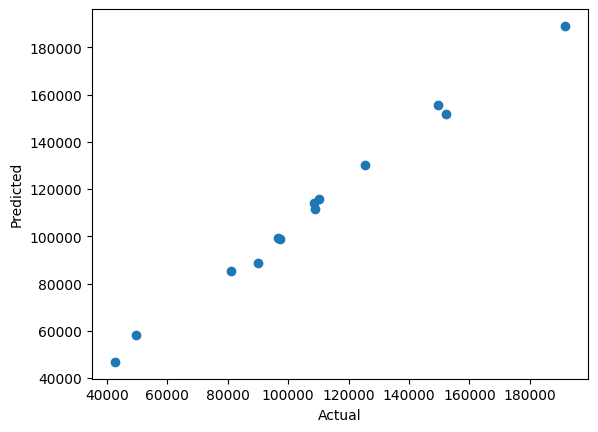

In [20]:
plt.scatter(y_test,prediction_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Profit'>

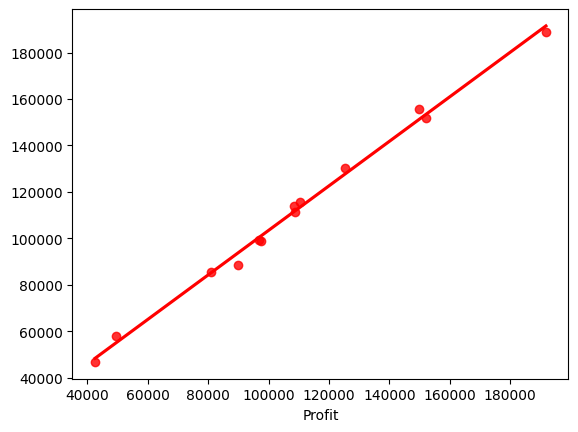

In [21]:
import seaborn as sns
sns.regplot(x=y_test, y=prediction_test, ci=None, color='red')

Check prediction on one data point

In [22]:
X_new = np.array([190200,75077,216670]).reshape(1,-1)
model.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([207471.60205685])

Save the Model

In [23]:
import pickle
pickle.dump(model, open('model.pkl','wb'))
print(model.predict([[190200,75077,216670]]))
model = pickle.load(open('model.pkl','rb'))


[207471.60205685]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
